In [61]:
from sklearn.datasets import  fetch_california_housing
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error

#PENDING ADD MISSING AND REMOVE NOT NEEDED

In [62]:
df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/sales.csv")
df.head()

,True_index,Store_ID,Day_of_week,Date,Nb_customers_on_day,Open,Promotion,State_holiday,School_holiday,Sales
0,0,625,3,2013-11-06,641,1,1,0,0,7293
1,1,293,2,2013-07-16,877,1,1,0,1,7060
2,2,39,4,2014-01-23,561,1,1,0,0,4565
3,3,676,4,2013-09-26,1584,1,1,0,0,6380
4,4,709,3,2014-01-22,1477,1,1,0,0,11647


In [63]:
df.shape

(640840, 10)

In [64]:
df.isnull().sum()

True_index             0
Store_ID               0
Day_of_week            0
Date                   0
Nb_customers_on_day    0
Open                   0
Promotion              0
State_holiday          0
School_holiday         0
Sales                  0
dtype: int64

In [65]:
df.dtypes

True_index              int64
Store_ID                int64
Day_of_week             int64
Date                   object
Nb_customers_on_day     int64
Open                    int64
Promotion               int64
State_holiday          object
School_holiday          int64
Sales                   int64
dtype: object

In [66]:
df = df.drop(columns=['Store_ID', "True_index"]) 

In [67]:
df[['Year', 'Month', 'Day']] = df['Date'].str.split('-', expand=True).astype(int)
df = df.drop(columns=['Date']) 
df

,Day_of_week,Nb_customers_on_day,Open,Promotion,State_holiday,School_holiday,Sales,Year,Month,Day
0,3,641,1,1,0,0,7293,2013,11,6
1,2,877,1,1,0,1,7060,2013,7,16
2,4,561,1,1,0,0,4565,2014,1,23
3,4,1584,1,1,0,0,6380,2013,9,26
4,3,1477,1,1,0,0,11647,2014,1,22
...,...,...,...,...,...,...,...,...,...,...
640835,6,611,1,0,0,0,4702,2014,9,20
640836,4,1267,1,1,0,0,12545,2015,1,15
640837,6,595,1,0,0,0,5823,2015,6,20
640838,1,599,1,1,0,1,7986,2014,8,18


In [68]:
df['State_holiday'] = df['State_holiday'].apply(lambda x: 0 if x == '0' else 1).astype(int)

In [69]:
df.describe()

,Day_of_week,Nb_customers_on_day,Open,Promotion,State_holiday,School_holiday,Sales,Year,Month,Day
count,640840.000000,640840.000000,640840.000000,640840.000000,640840.00000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000
mean,4.000189,633.398577,0.830185,0.381718,0.03071,0.178472,5777.469011,2013.832351,5.846555,15.711689
std,1.996478,464.094416,0.375470,0.485808,0.17253,0.382910,3851.338083,0.777335,3.326202,8.791182
min,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2013.000000,1.000000,1.000000
25%,2.000000,405.000000,1.000000,0.000000,0.00000,0.000000,3731.000000,2013.000000,3.000000,8.000000
50%,4.000000,609.000000,1.000000,0.000000,0.00000,0.000000,5746.000000,2014.000000,6.000000,16.000000
75%,6.000000,838.000000,1.000000,1.000000,0.00000,0.000000,7860.000000,2014.000000,8.000000,23.000000
max,7.000000,5458.000000,1.000000,1.000000,1.00000,1.000000,41551.000000,2015.000000,12.000000,31.000000


#### EDA

<Axes: xlabel='Sales', ylabel='Count'>

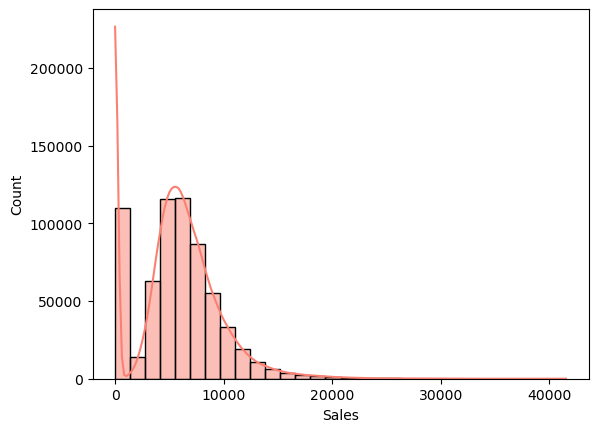

In [70]:
sns.histplot(df['Sales'], kde=True, bins=30, color="salmon")

<Axes: xlabel='Nb_customers_on_day', ylabel='Count'>

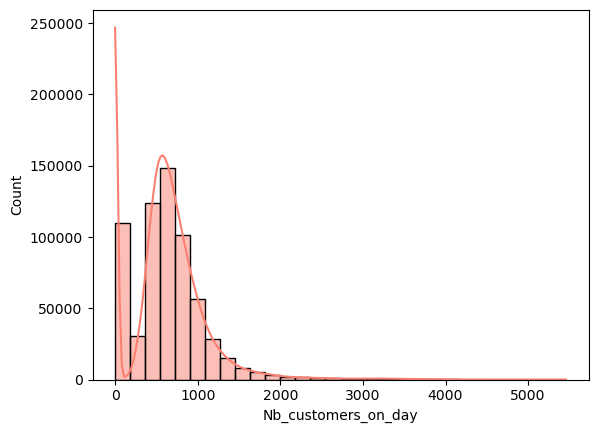

In [71]:
sns.histplot(df['Nb_customers_on_day'], kde=True, bins=30, color="salmon")

<Axes: ylabel='count'>

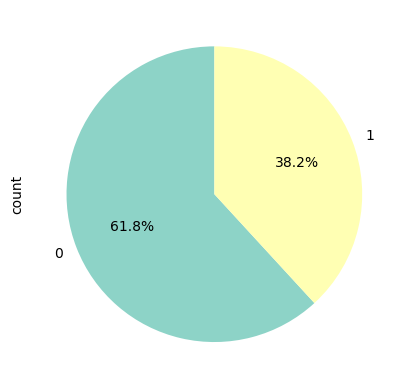

In [72]:
df['Promotion'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))

<Axes: ylabel='count'>

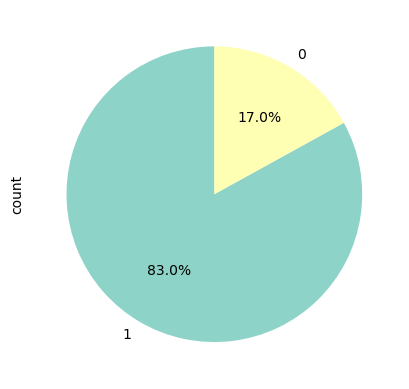

In [73]:
df['Open'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))

<Axes: >

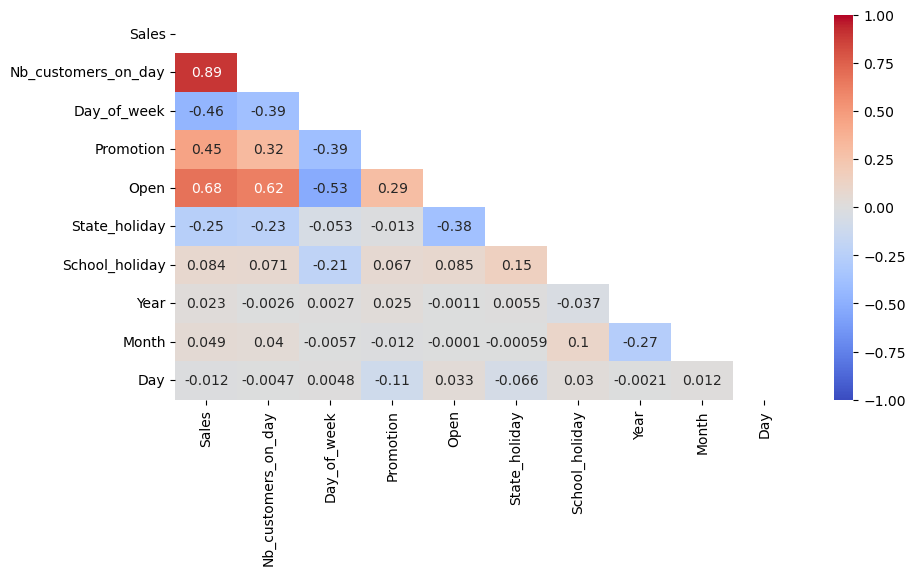

In [75]:
crosstab = df[['Sales', 'Nb_customers_on_day', 'Day_of_week', 'Promotion', 'Open', 'State_holiday', 'School_holiday', 'Year', 'Month', "Day"]].corr()
mask = np.triu(np.ones_like(crosstab, dtype=bool))
plt.figure(figsize=(10, 5))
sns.heatmap(crosstab, annot=True, cmap="coolwarm", vmin=-1, vmax=1, mask=mask)

C:\Users\ruben\AppData\Local\Temp\ipykernel_11484\2490761967.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x='Day_of_week', y="Sales", palette="coolwarm")


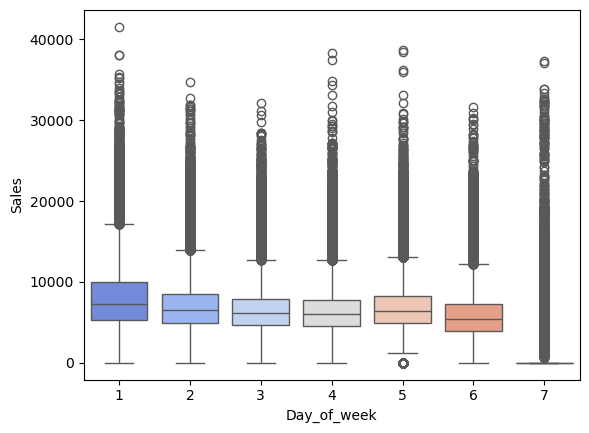

In [76]:
sns.boxplot(data = df, x='Day_of_week', y="Sales", palette="coolwarm")
plt.show()

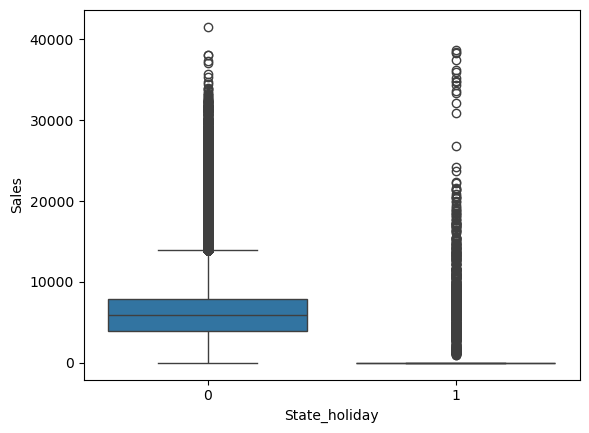

In [77]:
sns.boxplot(data = df, x="State_holiday", y="Sales")
plt.show()

<Axes: xlabel='Nb_customers_on_day', ylabel='Sales'>

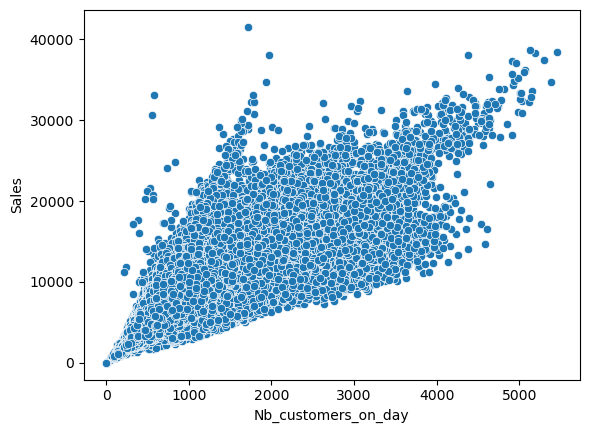

In [78]:
sns.scatterplot(data = df, x = "Nb_customers_on_day", y="Sales")

#### Train Test Split

In [79]:
features = df.drop(columns = ["Sales"])
target = df["Sales"]

In [145]:
features

,Day_of_week,Nb_customers_on_day,Open,Promotion,State_holiday,School_holiday,Year,Month,Day
0,3,641,1,1,0,0,2013,11,6
1,2,877,1,1,0,1,2013,7,16
2,4,561,1,1,0,0,2014,1,23
3,4,1584,1,1,0,0,2013,9,26
4,3,1477,1,1,0,0,2014,1,22
...,...,...,...,...,...,...,...,...,...
640835,6,611,1,0,0,0,2014,9,20
640836,4,1267,1,1,0,0,2015,1,15
640837,6,595,1,0,0,0,2015,6,20
640838,1,599,1,1,0,1,2014,8,18


In [80]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0)

#### Normalize

In [81]:
normalizer = StandardScaler()

normalizer.fit(X_train)

StandardScaler()

In [82]:
X_train_norm = normalizer.transform(X_train)

X_test_norm = normalizer.transform(X_test)

In [83]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)

#### KNN

In [84]:
from sklearn.neighbors import KNeighborsRegressor

In [85]:
knn = KNeighborsRegressor()

In [86]:
knn.fit(X_train_norm, y_train)

KNeighborsRegressor()

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error
from math import sqrt

pred = knn.predict(X_test_norm)

print(f"R2 score: ", knn.score(X_test_norm, y_test))
print(f"RMSE: ", root_mean_squared_error(y_test, pred))
print(f"MAE: ", mean_absolute_error(y_test, pred))

R2 score:  0.8670832600221753
RMSE:  1407.15007906295
MAE:  931.5795502777605


In [88]:
pred = knn.predict(X_train_norm)

print(f"R2 score: ", knn.score(X_train_norm, y_train))
print(f"RMSE: ", root_mean_squared_error(y_train, pred))
print(f"MAE: ", mean_absolute_error(y_train, pred))

R2 score:  0.9105075430490718
RMSE:  1151.5135552077313
MAE:  760.2188420666624


#### Bagging and Pasting

In [89]:
bagging_reg = BaggingRegressor(DecisionTreeRegressor(max_depth=8),
                               n_estimators=200,
                               max_samples = 10000)

In [90]:
bagging_reg.fit(X_train_norm, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=8),
                 max_samples=10000, n_estimators=200)

In [91]:
pred = bagging_reg.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", root_mean_squared_error(pred, y_test))
print("R2 score", bagging_reg.score(X_test_norm, y_test))

MAE 878.3792935144371
RMSE 1326.29881468972
R2 score 0.8819185697014607


In [92]:
pred = bagging_reg.predict(X_train_norm)

print(f"R2 score: ", bagging_reg.score(X_train_norm, y_train))
print(f"RMSE: ", root_mean_squared_error(y_train, pred))
print(f"MAE: ", mean_absolute_error(y_train, pred))

R2 score:  0.8802776230795726
RMSE:  1331.8751139918072
MAE:  878.9421347752842


#### Random Patches

In [93]:
forest = RandomForestRegressor(n_estimators=200,
                             max_depth=10)

In [94]:
forest.fit(X_train_norm, y_train)

RandomForestRegressor(max_depth=10, n_estimators=200)

In [95]:
pred = forest.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", root_mean_squared_error(pred, y_test))
print("R2 score", forest.score(X_test_norm, y_test))

MAE 871.1061311472566
RMSE 1314.0437837996462
R2 score 0.8840906382889292


In [96]:
pred = forest.predict(X_train_norm)

print(f"R2 score: ", forest.score(X_train_norm, y_train))
print(f"RMSE: ", root_mean_squared_error(y_train, pred))
print(f"MAE: ", mean_absolute_error(y_train, pred))

R2 score:  0.8850759272589606
RMSE:  1304.91235513682
MAE:  864.8973024015021


#### AdaBoost

In [97]:
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=6),
                            n_estimators=250)

In [98]:
ada_reg.fit(X_train_norm, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=6),
                  n_estimators=250)

In [99]:
pred = ada_reg.predict(X_test_norm)

print("R2 score", ada_reg.score(X_test_norm, y_test))
print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", root_mean_squared_error(pred, y_test))

R2 score 0.8448245508019627
MAE 1036.782845998464
RMSE 1520.4147865047573


In [100]:
pred = ada_reg.predict(X_train_norm)

print(f"R2 score: ", ada_reg.score(X_train_norm, y_train))
print(f"RMSE: ", root_mean_squared_error(y_train, pred))
print(f"MAE: ", mean_absolute_error(y_train, pred))

R2 score:  0.8445608167886018
RMSE:  1517.5957152320236
MAE:  1035.315083610534


### Gradient Boosting

In [118]:
gb_reg = GradientBoostingRegressor(max_depth=10,
                                   n_estimators=500)

In [119]:
gb_reg.fit(X_train_norm, y_train)

GradientBoostingRegressor(max_depth=10, n_estimators=500)

In [120]:
pred = gb_reg.predict(X_test_norm)

print("R2 score", gb_reg.score(X_test_norm, y_test))
print("RMSE", root_mean_squared_error(pred, y_test))
print("MAE", mean_absolute_error(pred, y_test))

R2 score 0.8838961102509503
RMSE 1315.1459863982827
MAE 864.271928764132


In [121]:
pred = gb_reg.predict(X_train_norm)

print(f"R2 score: ", gb_reg.score(X_train_norm, y_train))
print(f"RMSE: ", root_mean_squared_error(y_train, pred))
print(f"MAE: ", mean_absolute_error(y_train, pred))

R2 score:  0.9226184372996014
RMSE:  1070.7660353083152
MAE:  744.202860939636


## GRID SEARCH

In [ ]:
grid = {"n_estimators": [100, 175, 250],
        "max_leaf_nodes": [150, 200, 250],
        "max_depth":[11,13,15]}

In [142]:
gb_reg_grid = GradientBoostingRegressor()

In [143]:
model = GridSearchCV(estimator = gb_reg_grid, param_grid = grid, cv=5, verbose=5)

In [144]:
model.fit(X_train_norm, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


KeyboardInterrupt: 

In [ ]:
model.best_params_

{'max_depth': 13, 'max_leaf_nodes': 150, 'n_estimators': 100}

In [ ]:
best_model = model.best_estimator_

In [ ]:
best_model

GradientBoostingRegressor(max_depth=13, max_leaf_nodes=150)

In [ ]:
pred = best_model.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", root_mean_squared_error(pred, y_test))
print("R2 score", best_model.score(X_test_norm, y_test))

MAE 853.178418721521
RMSE 1286.8585221410904
R2 score 0.8888369515558268


In [ ]:
pred = best_model.predict(X_train_norm)

print("MAE", mean_absolute_error(pred, y_train))
print("RMSE", root_mean_squared_error(pred, y_train))
print("R2 score", best_model.score(X_train_norm, y_train))

MAE 836.8520644504101
RMSE 1238.9652294873952
R2 score 0.8963983770090775


In [ ]:
import pickle


pickle.dump(gb_reg, open("gb_reg_grid_model.pkl", "wb"))

pickle.dump(normalizer, open("normalizer.pkl", "wb"))

## RANDOM SEARCH

In [165]:
grid_2 = {"n_estimators": [int(x) for x in np.linspace(start = 80, stop = 175, num = 6)],
        "max_leaf_nodes": [int(x) for x in np.linspace(start = 125, stop = 200, num = 5)],
        "max_depth":[int(x) for x in np.linspace(11, 15, num = 5)]}

In [166]:
gb_reg_random = GradientBoostingRegressor()

In [167]:
model_2 = RandomizedSearchCV(estimator = gb_reg_random, param_distributions = grid_2, n_iter = 30, cv=5, n_jobs = -1, verbose=5)

In [168]:
model_2.fit(X_train_norm, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'max_depth': [11, 12, 13, 14, 15],
                                        'max_leaf_nodes': [125, 143, 162, 181,
                                                           200],
                                        'n_estimators': [80, 99, 118, 137, 156,
                                                         175]},
                   verbose=5)

In [169]:
model_2.best_params_

{'n_estimators': 80, 'max_leaf_nodes': 125, 'max_depth': 13}

In [170]:
best_model_2 = model_2.best_estimator_

In [171]:
pred = best_model_2.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", root_mean_squared_error(pred, y_test))
print("R2 score", best_model.score(X_test_norm, y_test))

MAE 854.0763629649234
RMSE 1286.5559540845888
R2 score 0.8888369515558268


In [172]:
pred = best_model_2.predict(X_train_norm)

print("MAE", mean_absolute_error(pred, y_train))
print("RMSE", root_mean_squared_error(pred, y_train))
print("R2 score", best_model.score(X_train_norm, y_train))

MAE 843.3430913473936
RMSE 1254.523916176883
R2 score 0.8963983770090775
